In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fishery = pd.read_csv("data/LandingSummaryExtract-Satterthwaite_Monthly.CSV")
larva = pd.read_csv("data/Fishlarvaldata_Capstone_2021_FromAndrewThompson_updated 1804 1904 1507 1607 1601 1704 1604 1501 1407 1311 ichthyoplankton by line and station.csv")



%matplotlib inline

In [2]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [3]:
cleaned_fishery = fishery.dropna(how = 'any')
cleaned_fishery['Year'] = cleaned_fishery['Year'].astype(int)
yellow_tail = cleaned_fishery.query('SpeciesCode == 40.0 & Year == 2017')

data = gpd.read_file("data/MAN_CA_CalTrawl.shp")
data = data.rename(columns = {'BLOCK10_ID':'BlockCode'})
data = data.merge(cleaned_fishery, on = 'BlockCode', how = 'left')


/home/leron/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
def block_larva_figure(speciesID, scientific_name, year, time_lag):
    larva_species = larva[larva["scientific_name"] !=0.0]
    geometry = [Point(xy) for xy in zip(larva_species["longitude"], larva_species["latitude"])]
    crs = {'init': 'EPSG:4326'}
    geo_df = gpd.GeoDataFrame(larva_species, geometry = geometry, crs = crs)
    geo_df = geo_df.to_crs("EPSG:3310")
larva['year'] = larva['year'].astype(int)
yellowtail_larva = larva[larva["Seriola.lalandi"] != 0.0]
geometry = [Point(xy) for xy in zip(yellowtail_larva["longitude"], yellowtail_larva["latitude"])]
crs = {'init': 'EPSG:4326'} #create coordinate ref system for yellowtail larva
geo_df = gpd.GeoDataFrame(yellowtail_larva, geometry = geometry, crs = crs)
geo_df = geo_df.to_crs("EPSG:3310")
data = gpd.read_file("data/MAN_CA_CalTrawl.shp")
data = data.rename(columns = {'BLOCK10_ID':'BlockCode'})

data = data.merge(cleaned_fishery, on = 'BlockCode', how = 'left')
data.head()


/home/leron/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,BlockCode,SHAPE_Leng,Shape_area,Shape_len,geometry,Year,Month,SpeciesName,SpeciesCode,TotalPrice,CatchLbs
0,101,64660.231467,2.559588e+08,64660.231358,"POLYGON ((-332829.325 430956.602, -332049.889 ...",NaN,NaN,NaN,NaN,NaN,NaN
1,102,77005.898285,1.936246e+08,77005.898173,"POLYGON ((-360539.462 432175.755, -359695.309 ...",NaN,NaN,NaN,NaN,NaN,NaN
2,103,64920.004778,2.559713e+08,64920.004892,"POLYGON ((-374393.149 432822.035, -373516.827 ...",NaN,NaN,NaN,NaN,NaN,NaN
3,104,64663.959040,2.559853e+08,64663.959051,"POLYGON ((-388245.367 433492.505, -387336.395 ...",NaN,NaN,NaN,NaN,NaN,NaN
4,105,64666.803125,2.559940e+08,64666.803194,"POLYGON ((-402096.282 434187.293, -401154.812 ...",NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

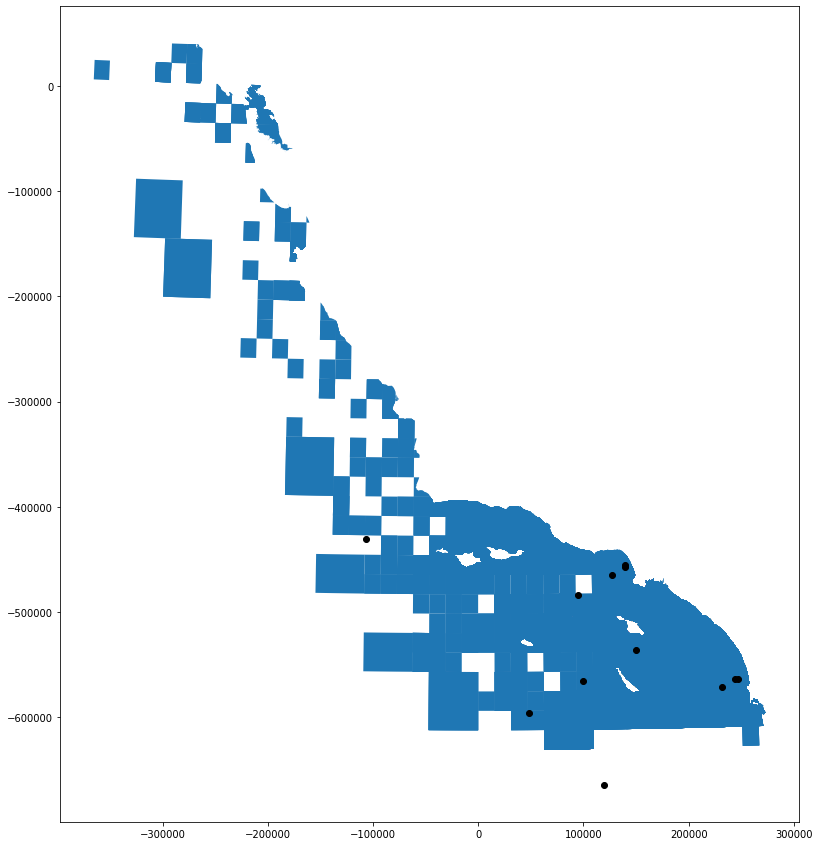

In [5]:
data_yellow_tail = data[(data.SpeciesCode == 40)]
fig,ax = plt.subplots(figsize =(15,15))
data_yellow_tail.plot(ax=ax)
geo_df.plot(ax=ax, color = 'black')
